In [1]:
import tensorflow as tf
tf.version.VERSION

'2.5.0'

In [2]:
import keras
print(keras.__version__)

2.5.0


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils

In [5]:
from sklearn.utils import shuffle
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from keras import backend as K
#K.set_image_dim_ordering('th')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Legend\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [7]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
PATH = os.getcwd()
# Define data path
data_path = PATH + '/data'
data_dir_list = os.listdir(data_path)

In [9]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=100

In [10]:
# Define the number of classes
num_classes = 7

img_data_list=[]

In [11]:
for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)

Loaded the images of dataset-class1

Loaded the images of dataset-class2

Loaded the images of dataset-class3

Loaded the images of dataset-class4

Loaded the images of dataset-class5

Loaded the images of dataset-class6

Loaded the images of dataset-class7



In [12]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(7538, 128, 128)


In [13]:
if num_channel==1:
	if K.image_data_format()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
		
else:
	if K.image_data_format()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)
		

(7538, 1, 128, 128)


In [14]:
# Assigning Labels

# Define the number of classes
num_classes = 7

In [15]:
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [16]:
print(labels)

[1 1 1 ... 1 1 1]


In [17]:
labels[1:852]=0
labels[853:2115]=1   
labels[2116:3495]=2
labels[3496:4314]=3
labels[4315:5603]=4
labels[5604:6863]=5
labels[6864:7538]=6

In [18]:
names = ['class1','class2','class3','class4','class5','class6','class7']

In [19]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [20]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)

In [21]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [22]:
# Defining the model
input_shape=img_data[0].shape

In [23]:
print(input_shape)

(1, 128, 128)


In [24]:
# number of convolutional filters to use
nb_filters = 32

In [25]:
# size of pooling area for max pooling
nb_pool = 2

In [26]:
# number of output classes
nb_classes = 7

In [27]:
#batch_size to train
batch_size = 20

In [28]:
# convolution kernel size
nb_conv = 3

In [29]:
# Defining the model
input_shape=img_data[0].shape

In [30]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation="relu", input_shape=input_shape, data_format='channels_first'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        padding='valid',
                        input_shape=(1,img_rows, img_cols)))
###By default, Convolution2D (https://keras.io/layers/convolutional/) expects the input to be in the format (samples, rows, cols, channels), which is "channels-last". 
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=['accuracy'])

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [32]:
# Viewing model_configuration

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 126, 126)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 42, 32)        36320     
_________________________________________________________________
activation (Activation)      (None, 10, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 14, 32)         9248      
_________________________________________________________________
activation_1 (Activation)    (None, 3, 14, 32)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 7, 32)          0

In [34]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 1, 128, 128),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'conv2d_input'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'batch_input_shape': (None, 1, 128, 128),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_first',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_1',
    'trainable': True,
    'batch_in

In [35]:
model.layers[0].get_config()

{'name': 'conv2d',
 'trainable': True,
 'batch_input_shape': (None, 1, 128, 128),
 'dtype': 'float32',
 'filters': 32,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'valid',
 'data_format': 'channels_first',
 'dilation_rate': (1, 1),
 'groups': 1,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [36]:
model.layers[0].input_shape

(None, 1, 128, 128)

In [37]:
model.layers[0].get_weights()

[array([[[[-0.13366303, -0.05866922, -0.06600878, -0.09736328,
            0.13754912, -0.00389531,  0.07495874, -0.00334458,
            0.12025   , -0.06087691,  0.04375069,  0.10010175,
            0.12914266, -0.0278963 ,  0.01536432,  0.07269597,
            0.09489083,  0.09075518,  0.10810716,  0.09927768,
            0.00353821, -0.09829478,  0.03868616, -0.1068779 ,
            0.02892746,  0.1340567 , -0.00724423, -0.11111151,
            0.12074329,  0.11458416,  0.09940554,  0.05159348]],
 
         [[ 0.09533438,  0.0041306 ,  0.12444629, -0.12789279,
           -0.07845642, -0.045876  , -0.03860328,  0.00787602,
           -0.13915637, -0.01020436,  0.03258787, -0.05343671,
            0.10353139,  0.06917146,  0.10101308,  0.08513489,
            0.01171122,  0.09468344, -0.05462734, -0.12076426,
           -0.04161664,  0.11828347,  0.0597702 ,  0.01613139,
           -0.00551029,  0.02799979, -0.07182755, -0.03254703,
           -0.07403547, -0.10381059, -0.06660723, -

In [38]:
np.shape(model.layers[0].get_weights()[0])

(3, 3, 1, 32)

In [39]:
#model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.layers[0].trainable

True

In [41]:
# Training
hist = model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=1, validation_data=(X_test, y_test))
#hist = model.fit(X_train, y_train, batch_size=32, nb_epoch=20,verbose=1, validation_split=0.2)#if not split previous

Epoch 1/100
377/377 [==============================] - 29s 9ms/step - loss: 1.8891 - accuracy: 0.2090 - val_loss: 1.6388 - val_accuracy: 0.3302
Epoch 2/100
377/377 [==============================] - 3s 8ms/step - loss: 1.6250 - accuracy: 0.3491 - val_loss: 1.5696 - val_accuracy: 0.3667
Epoch 3/100
377/377 [==============================] - 3s 8ms/step - loss: 1.4966 - accuracy: 0.4092 - val_loss: 1.3821 - val_accuracy: 0.4503
Epoch 4/100
377/377 [==============================] - 3s 8ms/step - loss: 1.4318 - accuracy: 0.4302 - val_loss: 1.3359 - val_accuracy: 0.4682
Epoch 5/100
377/377 [==============================] - 3s 8ms/step - loss: 1.3764 - accuracy: 0.4587 - val_loss: 1.2804 - val_accuracy: 0.5298
Epoch 6/100
377/377 [==============================] - 3s 8ms/step - loss: 1.3142 - accuracy: 0.4844 - val_loss: 1.3073 - val_accuracy: 0.4781
Epoch 7/100
377/377 [==============================] - 3s 8ms/step - loss: 1.2843 - accuracy: 0.4959 - val_loss: 1.1830 - val_accuracy: 0.535

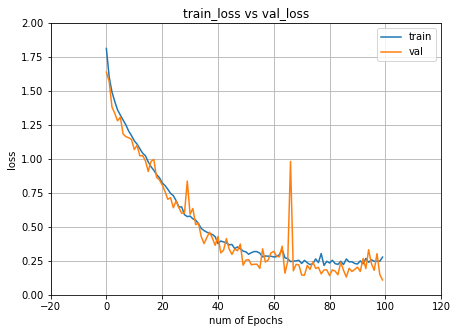

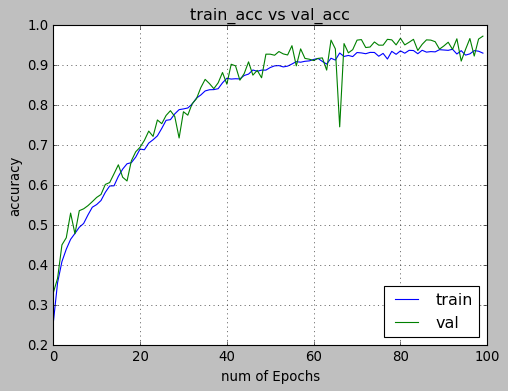

In [42]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(num_epoch)#if we dont use callback then uncomment unless run the next line
#xc=range(1)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [43]:
# Evaluating the model

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

Test Loss: 0.10901582986116409
Test accuracy: 0.9721485376358032
(1, 1, 128, 128)
[[3.9131138e-24 3.4696885e-14 1.5833214e-10 3.1340181e-13 2.1199903e-15
  1.0000000e+00 2.2873545e-16]]
[5]
[[0. 0. 0. 0. 0. 1. 0.]]


C:\Users\Legend\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [44]:
# Testing a new image
import cv2
test_image = cv2.imread('E://zzzzdelete/CancerCNNLSTM/CancerCNN/data/class1/109.class1.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

(128, 128)


In [45]:
if num_channel==1:
	if K.image_data_format()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_data_format()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		

(1, 1, 128, 128)


In [46]:
print(test_image.shape)

(1, 1, 128, 128)


In [47]:
test_image=test_image.reshape(1,1, 128, 128)

In [48]:
# Predicting the test image
print((model.predict(test_image)))
print('class')
print(model.predict_classes(test_image))

[[1. 0. 0. 0. 0. 0. 0.]]
class
[0]


In [49]:
# Testing a new image
import cv2
test_image = cv2.imread('E://zzzzdelete/CancerCNNLSTM/CancerCNN/data/class4/3499.class4.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

(128, 128)


In [50]:
if num_channel==1:
	if K.image_data_format()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_data_format()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		

(1, 1, 128, 128)


In [51]:
test_image=test_image.reshape(1,1, 128, 128)

In [52]:
# Predicting the test image
print((model.predict(test_image)))
print('class')
print(model.predict_classes(test_image))

[[1.3808045e-07 4.2526895e-04 1.8994898e-02 6.8146223e-01 2.2150239e-01
  2.6523415e-02 5.1091585e-02]]
class
[3]


In [53]:
layer_num=3
filter_num=0

In [54]:
#tf.compat.v1.disable_eager_execution()

In [55]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [56]:
Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

[[3.8700774e-24 3.4381592e-14 1.5720611e-10 ... 2.0977148e-15
  1.0000000e+00 2.2699437e-16]
 [2.9456635e-14 1.6508903e-10 2.1265906e-08 ... 9.9999988e-01
  7.4246827e-08 4.5333585e-15]
 [3.8267280e-12 1.6448346e-09 3.1590584e-08 ... 1.0000000e+00
  5.1599676e-11 7.4753788e-17]
 ...
 [3.3370691e-12 2.7143009e-05 9.9991214e-01 ... 1.8663595e-06
  1.2680470e-08 3.4068406e-09]
 [2.2880811e-21 3.7955912e-13 4.7239155e-09 ... 5.5076098e-15
  9.9999976e-01 6.9895656e-10]
 [1.0000000e+00 2.7160690e-11 3.8543534e-26 ... 4.6819589e-22
  4.1898985e-26 0.0000000e+00]]
[5 4 4 ... 2 5 0]


In [57]:
# Visualizing the intermediate layer
#to get the intermediate activation function
from tensorflow.python.keras.backend import eager_learning_phase_scope
from tensorflow.python.keras.backend  import symbolic_learning_phase
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

In [58]:


#f = K.function([model.layers[0].input],      
                              #[model.output])

# Run the function for the number of mc_samples with learning_phase enabled
#with eager_learning_phase_scope(value=1): # 0=test, 1=train
     #Yt_hat = np.array([f((X))[0] for _ in range(1)])

In [59]:
layer_num=3
filter_num=0

In [60]:
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [61]:
target_names = ['class1','class2','class3','class4','class5','class6','class7']

In [62]:
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

              precision    recall  f1-score   support

      class1       1.00      1.00      1.00       190
      class2       0.95      0.98      0.96       241
      class3       0.97      0.99      0.98       256
      class4       0.96      1.00      0.98       161
      class5       0.96      0.95      0.95       270
      class6       1.00      0.93      0.96       245
      class7       0.97      0.99      0.98       145

    accuracy                           0.97      1508
   macro avg       0.97      0.98      0.97      1508
weighted avg       0.97      0.97      0.97      1508

[[190   0   0   0   0   0   0]
 [  0 235   0   0   6   0   0]
 [  0   3 253   0   0   0   0]
 [  0   0   0 161   0   0   0]
 [  0   5   4   3 256   0   2]
 [  0   4   3   2   6 228   2]
 [  0   0   0   2   0   0 143]]


Confusion matrix, without normalization
[[190   0   0   0   0   0   0]
 [  0 235   0   0   6   0   0]
 [  0   3 253   0   0   0   0]
 [  0   0   0 161   0   0   0]
 [  0   5   4   3 256   0   2]
 [  0   4   3   2   6 228   2]
 [  0   0   0   2   0   0 143]]


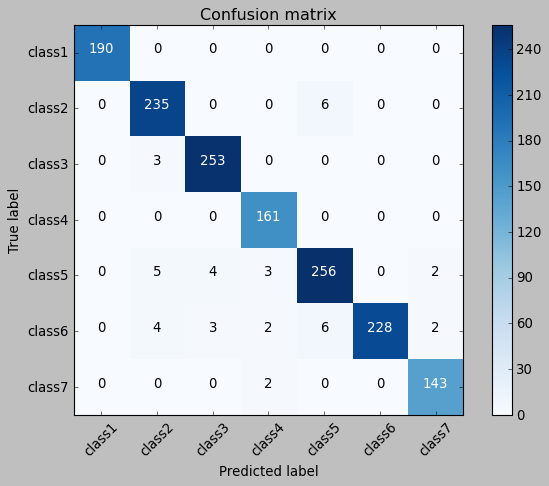

In [63]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()
